# Libraries

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
from statistics import mean
from statistics import stdev

# 1

## 1-a)

In [19]:
def binomial_sample(n,p,s):
    sample_list=[]
    for j in range(s):
        u=np.random.uniform(0,1)
        i=0
        sum=0
        while (sum<=u):
            sum=sum+math.comb(n,i)*pow(p,i)*pow((1-p),(n-i))
            #ror what i, the probability of random variable being smaller than i is equal to x? (not exactly(includes talk abt infimum))
            i=i+1
        sample_list.append(i-1)   
    return sample_list

C:\Users\Saman\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

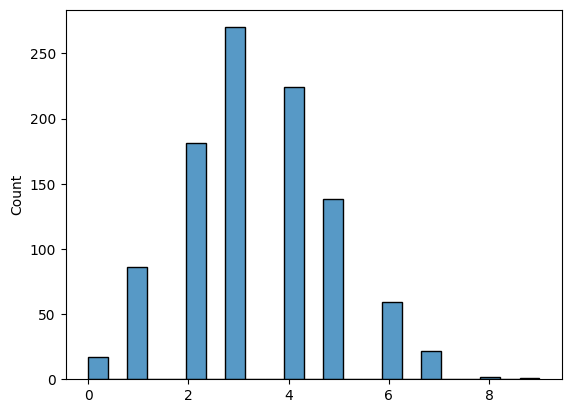

In [161]:
sns.histplot(binomial_sample(10,1/3,1000))

## 1_b)

In [212]:
def binomial_sample2(n,p,s):
    sample_list=[]
    for i in range(s):
        binomial=0
        for j in range(n):
            u=np.random.uniform(0,1)
            bernoulli=1 if u < p else 0
            binomial=binomial+bernoulli
        sample_list.append(binomial)   
    return sample_list    

In [213]:
binomial_sample2(10,1/3,20)

[6, 3, 3, 1, 4, 5, 4, 6, 2, 7, 2, 6, 2, 3, 4, 3, 6, 3, 3, 4]

C:\Users\Saman\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

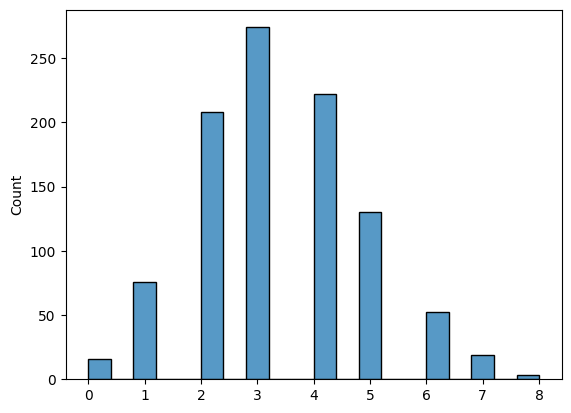

In [214]:
sns.histplot(binomial_sample2(10,1/3,1000))

## 1-c)

In [23]:
bi_sample=binomial_sample(10,1/3,100)
m=mean(bi_sample)
sd=stdev(bi_sample)
margin=sd/math.sqrt(100)
print(f"sample mean={m}\nsample standard deviation={sd}\n95% Confidence Interval is {m-margin*1.96} , {m+margin*1.96}")


sample mean=3.43
sample standard deviation=1.4302291968616623
95% Confidence Interval is 3.1496750774151145 , 3.7103249225848858


In [26]:
sample_means=[]
for i in range(100):
    sample_means.append(mean(binomial_sample(10,1/3,100)))

C:\Users\Saman\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

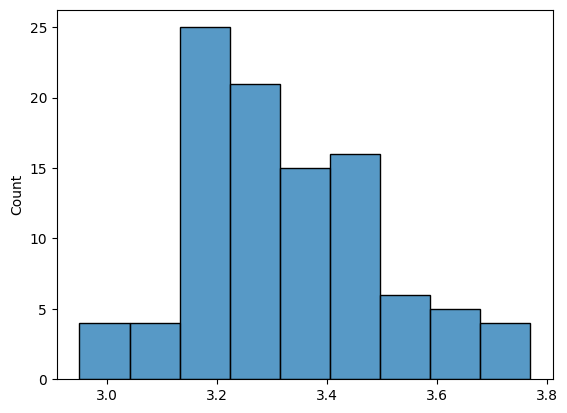

In [27]:
sns.histplot(sample_means)

In [173]:
print(mean(sample_means))

3.33683


In [177]:
print(stdev(sample_means)/math.sqrt(100))

0.004849118528665853


# 2

In [199]:
def poisson_sampler(parameter,number):
    poisson_samples=[]
    for i in range(number):
        sum=0;n=0
        while (sum<=1):
            u=np.random.uniform(0,1)
            sum=sum-(math.log(1-u))/parameter
            n=n+1
        poisson_samples.append(n-1)
    return(poisson_samples)


In [3]:
def poisson_sampler2(parameter,number):
    poisson_samples=[]
    for i in range(number):
        sum=0;n=0
        while (sum<=parameter):
            u=np.random.uniform(0,1)
            sum=sum-(math.log(1-u))
            #we dont divide anymore because we are now sampling from exponential with rate=1
            #this is the same as waiting till it exceeds 1 but sampling from exponential with arbitrary wait (we changed the condition in while)
            #Intuitively, in the previous method we add waiting times untill they exceed 1 (unit time) then return the number of terms
            #in this code however, we sum exponentials with rate 1 until it exceeds t. We can do this because if rate is t=>unit time for t people, if rate is 1=>t time for t people
            #the number of terms=the number of arrivals in time t for poisson with rate=1 is the same as number of arrivals in time 1 for poisson with time t
            n=n+1
        poisson_samples.append(n-1)
    return(poisson_samples)

C:\Users\Saman\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

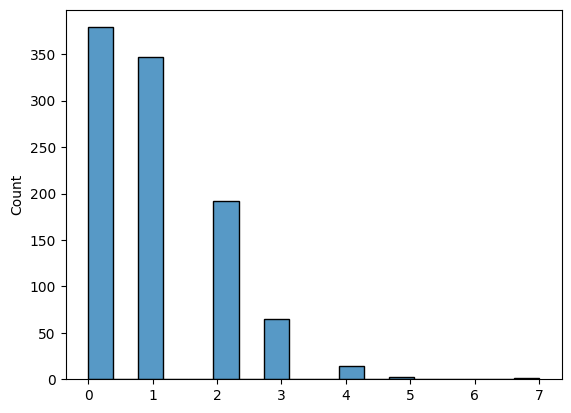

In [242]:
sns.histplot(poisson_sampler2(1,1000))

In [28]:
psample10=poisson_sampler2(1,10)
m=mean(psample10)
sd=stdev(psample10)
margin=sd/math.sqrt(10)
print(f"sample mean={m}\nsample standard deviation={sd}\n95% Confidence Interval is {m-margin*1.96} , {m+margin*1.96}")

sample mean=1.3
sample standard deviation=1.5670212364724212
95% Confidence Interval is 0.328750175175191 , 2.271249824824809


In [29]:
psample100=poisson_sampler2(1,100)
m=mean(psample100)
sd=stdev(psample100)
margin=sd/math.sqrt(100)
print(f"sample mean={m}\nsample standard deviation={sd}\n95% Confidence Interval is {m-margin*1.96} , {m+margin*1.96}")

sample mean=1.19
sample standard deviation=1.1073218214058713
95% Confidence Interval is 0.9729649230044491 , 1.4070350769955506


In [37]:
psample1000=poisson_sampler2(1,1000)
m=mean(psample1000)
sd=stdev(psample1000)
margin=sd/math.sqrt(1000)
print(f"sample mean={m}\nsample standard deviation={sd}\n95% Confidence Interval is {m-margin*1.96} , {m+margin*1.96}")

sample mean=1.045
sample standard deviation=1.0217724888736333
95% Confidence Interval is 0.9816698850193412 , 1.1083301149806588


In [42]:
psample10000=poisson_sampler2(1,10000)
m=mean(psample10000)
sd=stdev(psample10000)
margin=sd/math.sqrt(10000)
print(f"sample mean={m}\nsample standard deviation={sd}\n95% Confidence Interval is {m-margin*1.96} , {m+margin*1.96}")

sample mean=1.004
sample standard deviation=0.995431106761704
95% Confidence Interval is 0.9844895503074707 , 1.0235104496925294


# 3

## 3-a

In [45]:
def mixture(x):
    mixture=0.8*1./(np.sqrt(2*np.pi)*0.1)*np.exp(-0.5 * (1./0.1*(x - 2))**2)+0.2*1./(np.sqrt(2*np.pi)*0.5)*np.exp(-0.5 * (1./0.5*(x - 1))**2)
    return mixture


In [46]:
def proposed(x):
    proposed=1./(np.sqrt(2*np.pi)*1)*np.exp(-0.5 * (1./1*(x - 2))**2)
    return proposed
#we choose f so that its mean is at 2

In [47]:
M=mixture(2)/proposed(2)
print(M)
#the output of this is M

8.054134113294644


In [48]:
def rejection_sampler():
    samples=[]
    counter=0
    psample=np.random.normal(loc=2.,scale=1,size=10000)
    for x in psample:
        u=np.random.uniform(0,1)
        if u<=mixture(x)/(proposed(x)*M):
            samples.append(x)
            counter=counter+1
        rate=counter/10000
    return samples,counter


In [49]:
sample,_=rejection_sampler()

In [50]:
_,rate=rejection_sampler()
print(rate)

1197


C:\Users\Saman\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


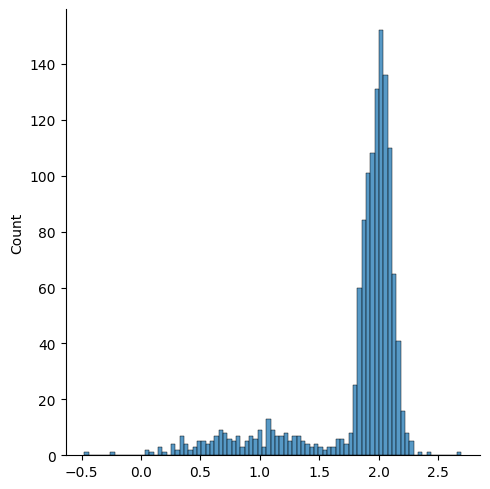

In [137]:
sns.displot(sample)

## 3b

In [153]:
def exponential_sampler(parameter):
    u=np.random.uniform(0,1)
    x=-math.log(u)/parameter
    return x

In [232]:
def exp_rejection_sampler(a,parameter):
    samples=[]
    counter=0
    M=np.exp(a)
    for i in range (10000):
        x=exponential_sampler(parameter)
        f=0 if x<a else parameter*np.exp(-parameter*(x-a))
        g=parameter*np.exp(-parameter*x)    
        u=np.random.uniform(0,1)
        if u<=f/(g*M):
            samples.append(x)
            counter=counter+1
    rate=counter/10000
    return samples,rate


C:\Users\Saman\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


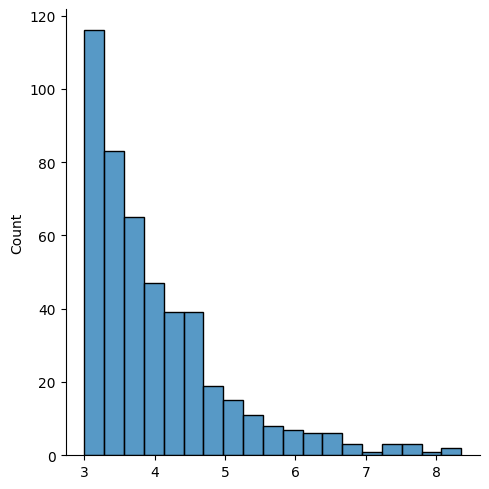

In [238]:
exp_samples,_=exp_rejection_sampler(3,1)
sns.displot(exp_samples)

In [235]:
a_list=np.linspace(0,3,20)
acceptance_rates=[]
for i in a_list:
    _,acceptance_rate=exp_rejection_sampler(i,1)
    acceptance_rates.append(acceptance_rate)

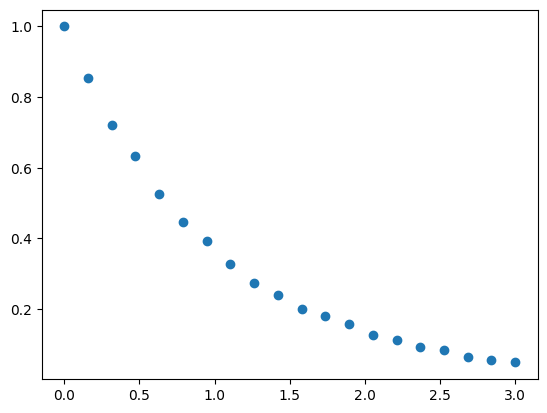

In [236]:
plt.scatter(a_list,acceptance_rates)
#change of acceptance rates with regards to a